# INTRODUCTION

We'll use the Cambridge Crime 2009-2016 dataset for our analysis. You can find the raw data here: https://query.data.world/s/d4je5crtjeezijfa6j7oo5lov6ejxd

There are several options for getting the dataset into Jupyter:

Download the CSV manually and upload it via Jupyter's GUI                                                                       
Use the urlretrieve function from the urllib.request to download CSV files from a raw URL directly                             
Use a helper library e.g. opendatasets, which contains a collection of curated datasets and provides a function for directly download.                                                                                                                       

As a first step, let's upload our Jupyter notebook to [Jovian.ml](https://jovian.ml).

In [1]:
project_name = "Course Project- Cambride Crime dataset Analysis" 

In [2]:
!pip install jovian --upgrade -q

In [3]:
import jovian

In [4]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "abhijeet-chatterjee2019/course-project-cambride-crime-dataset-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/abhijeet-chatterjee2019/course-project-cambride-crime-dataset-analysis


'https://jovian.ml/abhijeet-chatterjee2019/course-project-cambride-crime-dataset-analysis'

## Data Preparation and Cleaning

While the survey responses contain a bunch of information, we'll limit our analysis to the following areas-:

Date of Reports                                                                                                                 
Crime                                                                                                                           
Reporting Area                                                                                                                 
Neighborhood                                                                                                                   
Location

Selecting a subset of columns with the relevant data for our analysis.

In [5]:
import urllib.request

In [6]:
dataset=urllib.request.urlretrieve("https://query.data.world/s/d4je5crtjeezijfa6j7oo5lov6ejxd")

In [7]:
import pandas as pd
df = pd.read_csv('https://query.data.world/s/d4je5crtjeezijfa6j7oo5lov6ejxd')

In [8]:
df

,File Number,Date of Report,Crime Date Time,Crime,Reporting Area,Neighborhood,Location
0,2009-00002,01/01/2009 12:39:00 AM,1/1/09 0:39,Simple Assault,504.0,Cambridgeport,"400 Massachusetts Avenue, Cambridge, MA"
1,2009-00003,01/01/2009 01:34:00 AM,1/1/09 1:34,Simple Assault,610.0,Mid-Cambridge,"200 HAMPSHIRE STREET, Cambridge, MA"
2,2009-00004,01/01/2009 01:43:00 AM,01/01/2009 02:20 - 02:35,Aggravated Assault,708.0,Riverside,"DUNSTER STREET & MOUNT AUBURN STREET, Cambridg..."
3,2009-00005,01/01/2009 02:27:00 AM,01/01/2009 02:20 - 02:45,Simple Assault,105.0,East Cambridge,"100 SCIARAPPA STREET, Cambridge, MA"
4,2009-00006,01/01/2009 02:34:00 AM,01/01/2009 02:15 - 02:35,Disorderly,708.0,Riverside,"1200 Massachusetts Avenue, Cambridge, MA"
...,...,...,...,...,...,...,...
56009,2016-07187,09/30/2016 04:05:00 PM,09/28/2016 17:00 - 18:00,Larceny from Residence,510.0,Cambridgeport,"0 FAIRMONT AVE, Cambridge, MA"
56010,2016-07189,09/30/2016 05:38:00 PM,09/30/2016 16:30 - 17:38,Hit and Run,1105.0,North Cambridge,"2000 MASSACHUSETTS AVE, Cambridge, MA"
56011,2016-07192,09/30/2016 06:52:00 PM,09/16/2016 18:52 - 09/30/2016 18:52,Harassment,702.0,Riverside,"0 Soden St, Cambridge, MA"
56012,2016-07194,09/30/2016 07:52:00 PM,09/30/2016 19:51,Hit and Run,1002.0,West Cambridge,"University Rd & Mount Auburn St, Cambridge, MA"


In [9]:
df.columns

Index(['File Number', 'Date of Report', 'Crime Date Time', 'Crime',
       'Reporting Area', 'Neighborhood', 'Location'],
      dtype='object')

In [10]:
df.sample(10)

,File Number,Date of Report,Crime Date Time,Crime,Reporting Area,Neighborhood,Location
11863,2010-05832,08/03/2010 04:37:00 PM,08/01/2010 20:47 - 08/02/2010 07:47,Mal. Dest. Property,903.0,Peabody,"0 LINNAEAN STREET, Cambridge, MA"
4653,2009-05991,08/16/2009 08:50:00 PM,08/16/2009 20:30 - 20:45,Mal. Dest. Property,510.0,Cambridgeport,"300 RIVER STREET, Cambridge, MA"
6724,2009-08623,11/18/2009 05:34:00 PM,11/18/2009 17:30 - 17:34,Simple Assault,501.0,Cambridgeport,"600 Massachusetts Avenue, Cambridge, MA"
8243,2010-00957,02/10/2010 08:37:00 PM,02/10/2010 19:00 - 20:30,Hit and Run,609.0,Mid-Cambridge,"0 INMAN STREET, Cambridge, MA"
39808,2014-04448,06/24/2014 09:05:00 PM,06/24/2014 21:04,Shoplifting,102.0,East Cambridge,"100 CAMBRIDGESIDE PL, Cambridge, MA"
15677,2011-00861,02/05/2011 03:38:00 PM,01/30/2011 17:00 - 23:00,Forgery,501.0,Cambridgeport,"600 MASSACHUSETTS Avenue, Cambridge, MA"
35541,2013-08545,10/27/2013 02:32:00 PM,10/27/13 14:31,Auto Theft,1204.0,Highlands,"200 Alewife Brook Pky, Cambridge, MA"
23826,2012-01821,03/11/2012 06:59:00 PM,3/11/12 18:58,Drugs,102.0,East Cambridge,"100 CAMBRIDGESIDE PLACE, Cambridge, MA"
46828,2015-04046,06/08/2015 05:35:00 PM,06/08/2015 08:30 - 17:34,Housebreak,403.0,Area 4,"100 HARVARD ST, Cambridge, MA"
33844,2013-06135,08/11/2013 12:17:00 AM,08/10/2013 22:30 - 08/11/2013 00:17,Missing Person,707.0,Riverside,"0 Mount Auburn STREET, Cambridge, MA"


In [11]:
df.shape

(56014, 7)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56014 entries, 0 to 56013
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   File Number      56014 non-null  object 
 1   Date of Report   56014 non-null  object 
 2   Crime Date Time  56014 non-null  object 
 3   Crime            56014 non-null  object 
 4   Reporting Area   56012 non-null  float64
 5   Neighborhood     56012 non-null  object 
 6   Location         55931 non-null  object 
dtypes: float64(1), object(6)
memory usage: 3.0+ MB


Most columns have the data type object, either because they contain values of different types. It appears that Loations column contains some empty values, since the Non-Null count for every column is lower than the total number of rows (56014).We'll need to deal with empty values and manually adjust the data type for each column on a case-by-case basis.

In [13]:
for location in df.Location:
    if location=="0":
        location="Not Reported"

In [14]:
df.Location

0                  400 Massachusetts Avenue, Cambridge, MA
1                      200 HAMPSHIRE STREET, Cambridge, MA
2        DUNSTER STREET & MOUNT AUBURN STREET, Cambridg...
3                      100 SCIARAPPA STREET, Cambridge, MA
4                 1200 Massachusetts Avenue, Cambridge, MA
                               ...                        
56009                        0 FAIRMONT AVE, Cambridge, MA
56010                2000 MASSACHUSETTS AVE, Cambridge, MA
56011                            0 Soden St, Cambridge, MA
56012       University Rd & Mount Auburn St, Cambridge, MA
56013                   BRATTLE ST & JFK ST, Cambridge, MA
Name: Location, Length: 56014, dtype: object

Let's extract a copy of the data from these columns into a new data frame survey_df, which we can continue to modify further without affecting the original data frame.

In [15]:
selected_columns=["Date of Report","Crime","Reporting Area","Neighborhood","Location"]
len(selected_columns)

5

In [16]:
survey_df = df[selected_columns].copy()
for location in survey_df.Location:
    if location=="0":
        location="Not Reported"
survey_df.shape

(56014, 5)

In [17]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56014 entries, 0 to 56013
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date of Report  56014 non-null  object 
 1   Crime           56014 non-null  object 
 2   Reporting Area  56012 non-null  float64
 3   Neighborhood    56012 non-null  object 
 4   Location        55931 non-null  object 
dtypes: float64(1), object(4)
memory usage: 2.1+ MB


In [18]:
survey_df

,Date of Report,Crime,Reporting Area,Neighborhood,Location
0,01/01/2009 12:39:00 AM,Simple Assault,504.0,Cambridgeport,"400 Massachusetts Avenue, Cambridge, MA"
1,01/01/2009 01:34:00 AM,Simple Assault,610.0,Mid-Cambridge,"200 HAMPSHIRE STREET, Cambridge, MA"
2,01/01/2009 01:43:00 AM,Aggravated Assault,708.0,Riverside,"DUNSTER STREET & MOUNT AUBURN STREET, Cambridg..."
3,01/01/2009 02:27:00 AM,Simple Assault,105.0,East Cambridge,"100 SCIARAPPA STREET, Cambridge, MA"
4,01/01/2009 02:34:00 AM,Disorderly,708.0,Riverside,"1200 Massachusetts Avenue, Cambridge, MA"
...,...,...,...,...,...
56009,09/30/2016 04:05:00 PM,Larceny from Residence,510.0,Cambridgeport,"0 FAIRMONT AVE, Cambridge, MA"
56010,09/30/2016 05:38:00 PM,Hit and Run,1105.0,North Cambridge,"2000 MASSACHUSETTS AVE, Cambridge, MA"
56011,09/30/2016 06:52:00 PM,Harassment,702.0,Riverside,"0 Soden St, Cambridge, MA"
56012,09/30/2016 07:52:00 PM,Hit and Run,1002.0,West Cambridge,"University Rd & Mount Auburn St, Cambridge, MA"


In [19]:
import jovian

In [20]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "abhijeet-chatterjee2019/course-project-cambride-crime-dataset-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/abhijeet-chatterjee2019/course-project-cambride-crime-dataset-analysis


'https://jovian.ml/abhijeet-chatterjee2019/course-project-cambride-crime-dataset-analysis'

## Exploratory Analysis and Visualization

Before we can ask interesting questions about the datasat, it would help to understand the demographics like Types of crimes and their frequency, number of reports each year . It's important to explore these variable in order to understand the dataset to answer questions.

Let's begin by importing matplotlib.pyplot and seaborn

In [21]:
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

C:\Users\ABHIJEET\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Crimes
The types of crimes that were reported in Cambridge.

In [22]:
survey_df.Crime.nunique()

54

In [23]:
crime_count = survey_df.Crime.value_counts().head(30)
crime_count

Larceny from MV           4837
Hit and Run               4662
Domestic Dispute          3909
Mal. Dest. Property       3671
Simple Assault            3295
Larceny from Building     2857
Shoplifting               2789
Larceny of Bicycle        2750
Housebreak                2676
Forgery                   2584
Warrant Arrest            2575
Larceny from Person       2276
Larceny from Residence    1743
Aggravated Assault        1726
Threats                   1637
Auto Theft                1102
Missing Person             950
Flim Flam                  939
Harassment                 816
Street Robbery             759
Drugs                      673
Admin Error                660
Accident                   627
Commercial Break           584
Phone Calls                450
OUI                        387
Suspicious Package         381
Violation of R.O.          377
Trespassing                359
Disorderly                 306
Name: Crime, dtype: int64

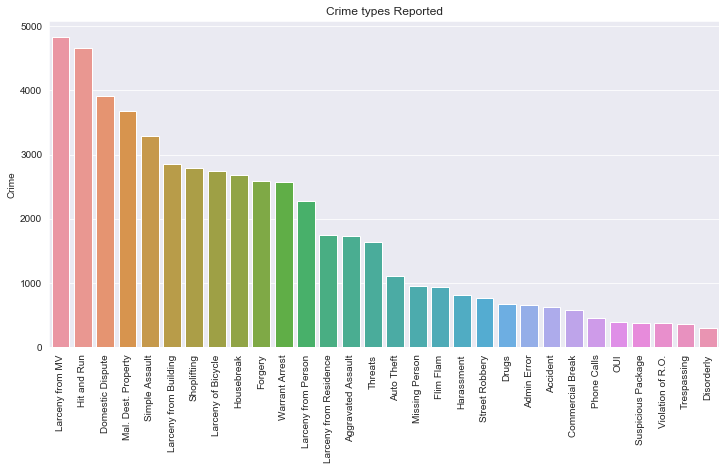

In [24]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
plt.title("Crime types Reported")
sns.barplot(crime_count.index, crime_count);

As we can see from the plot that most case reported in cambridge were of (Larcency from MV) followed by (Hit and Run) and (Domestic dispute)

### Reports of Each Year
Number of crimes reported each year from 2009 to 2016

In [25]:
DOR=survey_df["Date of Report"].copy()
years=["2009","2010","2011","2012","2013","2014","2015","2016"]
crime_count=[0,0,0,0,0,0,0,0]
for i in range(0,8):
    for date in DOR:
        if(years[i] in date):
            crime_count[i]+=1;

In [26]:
crime_count

[7489, 7508, 7418, 7130, 6952, 7413, 7085, 5019]

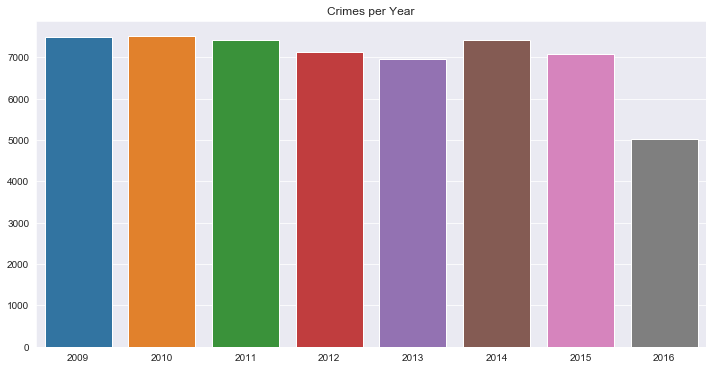

In [27]:
plt.figure(figsize=(12,6))
plt.xticks()
plt.title("Crimes per Year")
sns.barplot(years, crime_count);

The Plot shows number of cases Reported to the police each year from 2009 to 2016.

In [28]:
import jovian

In [29]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "abhijeet-chatterjee2019/course-project-cambride-crime-dataset-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/abhijeet-chatterjee2019/course-project-cambride-crime-dataset-analysis


'https://jovian.ml/abhijeet-chatterjee2019/course-project-cambride-crime-dataset-analysis'

## Asking and Answering Questions

We've already gained insights, simply by exploring individual columns of the dataset. Let's ask some specific questions, and try to answer them using data frame operations and interesting visualizations.

### Which is the neighbourhood where most Cases are reported?

To answer this question we will calculate the unique elements in neighbourhood column of survey_df and alculate the frequency of each unique item and plot it. 

In [30]:
survey_df.Neighborhood.nunique()

13

In [31]:
neighbourhood_report = survey_df.Neighborhood.value_counts()
neighbourhood_report

Cambridgeport       7830
East Cambridge      7691
Area 4              6025
North Cambridge     5602
West Cambridge      5544
Mid-Cambridge       5496
Riverside           5254
Inman/Harrington    4195
Peabody             3522
Agassiz             1520
Highlands           1203
MIT                 1092
Strawberry Hill     1038
Name: Neighborhood, dtype: int64

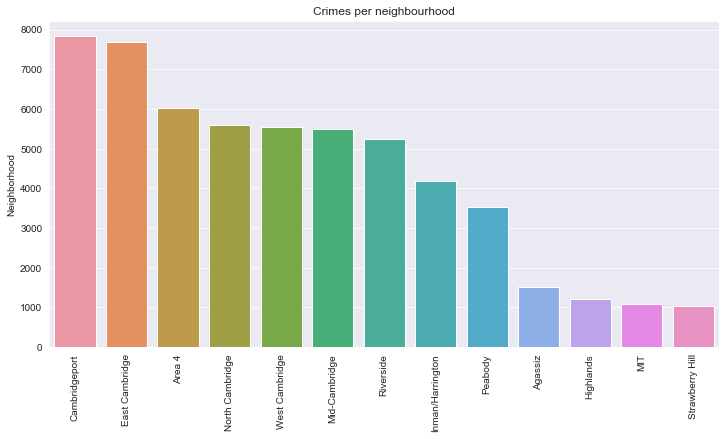

In [32]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
plt.title("Crimes per neighbourhood")
sns.barplot(neighbourhood_report.index, neighbourhood_report);

The Bar graph above shows that most cases reported in Cambridge are near Cambridgeport with count of 7830 reports, followed by East Cambridge with 7691 reports and Area 4 with 6025 reports.

Hence Cambridgeport is the most crime-prone area in Cambridge and                                                                     Strawberry hills is the least crime-prone area in Cambridge.

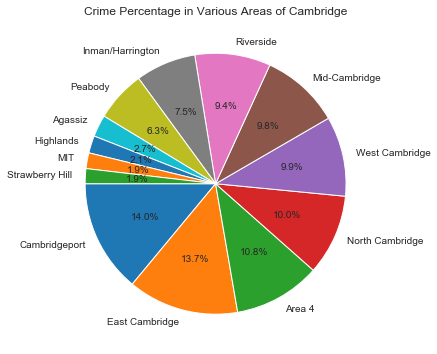

In [33]:
plt.figure(figsize=(12,6))
plt.title("Crime Percentage in Various Areas of Cambridge")
plt.pie(neighbourhood_report, labels=neighbourhood_report.index, autopct='%1.1f%%', startangle=180);

From the above pie chart it is clearly depicted that of all the crimes in Cambridge (14% crimes took place at CambridgePort), (13.7% crimes took place East Cambridge) and so on.

### Changes in the number of crimes reported over the years

This question is answer to the variation in the number of crimes over the years 2009-2016 in Cambridge. 

In [34]:
for i in range(0,8):
    print("Year:"+years[i]+"      Crime Reported:"+(str)(crime_count[i]))

Year:2009      Crime Reported:7489
Year:2010      Crime Reported:7508
Year:2011      Crime Reported:7418
Year:2012      Crime Reported:7130
Year:2013      Crime Reported:6952
Year:2014      Crime Reported:7413
Year:2015      Crime Reported:7085
Year:2016      Crime Reported:5019


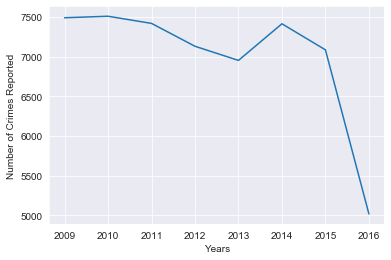

In [35]:
plt.plot(years,crime_count)
plt.xlabel("Years")
plt.ylabel("Number of Crimes Reported")
plt.show()

The above graph shows that the graph shows steady decrease till 2013, then there is a sudden rise in 2014 and then exponential decrease till 2016.

### Top 5 areas in Cambridge where most cases were reported

To answer this we need to calculate the total cases reported in each area and plot it .

In [36]:
Report_Area=survey_df["Reporting Area"].copy()
Report_Area.nunique()

117

In [37]:
Reports_per_area=Report_Area.value_counts().head(5)
Reports_per_area

1002.0    2712
102.0     2555
501.0     2168
105.0     1614
411.0     1489
Name: Reporting Area, dtype: int64

This shows that the Areas 1002,102,501,105,411 are the area from where majority of reports have been filed from. 

In [38]:
import jovian

In [39]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "abhijeet-chatterjee2019/course-project-cambride-crime-dataset-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/abhijeet-chatterjee2019/course-project-cambride-crime-dataset-analysis


'https://jovian.ml/abhijeet-chatterjee2019/course-project-cambride-crime-dataset-analysis'

## Inferences and Conclusion

We've drawn many interesting inferences from the survey, here's a summary of the few of them-:


1- There are 54 categories of crime are reported in Cambridge and Larcency from MV(Motor Vehicles) being most reported
   category.
  

2- Among the 13 neighbourhoods in which Cambridge is divided most of the reports came from the CambridgePort area (about 14% of the total crime reported in the City were from this area) followed by
   East Cambridge (with 13.7%) . As the port area is the most Busy and bustling area of the city, so chances of crime in this area is quite
   high. Therefore as safety measure, extra forces should patrol this area.

3- The number of reporting of crimes were steadily decreasing till 2013, but in 2014 a sudden rise is observed maybe some orgnised crime would have happened. But then from 2015 to 2016 there is exponential decrease in crime. This proves the method the police force are using there is quite effective against crimes.

4- The area number 1002 of Cambridge, has quite high crime reporting so the patrols and civilians there should be on Alert.

In [40]:
import jovian

In [41]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "abhijeet-chatterjee2019/course-project-cambride-crime-dataset-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/abhijeet-chatterjee2019/course-project-cambride-crime-dataset-analysis


'https://jovian.ml/abhijeet-chatterjee2019/course-project-cambride-crime-dataset-analysis'

## References and Future Work

There is a lot of information that can be discovered using the dataset, and we've barely scratched the surface. Here are some ideas for further exploration:

1-Compare the crime times and make sets of it, to see if crunch time when chances of crimes are high.                             
2-Choose a different set of columns (we chose on 5 out of 7) to analyze other facets of the data using all 7 would give us more information.                                                                                                                   
3-Compare the dataset of  years after 2016 with this dataset and identify chnges in reporting or new type of crimes being reported.                                                                                                                            


References:                                                                                                                     
Crime in Cambridge in 2009-2016: https://query.data.world/s/d4je5crtjeezijfa6j7oo5lov6ejxd                                     
Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html                                                         
Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html                                                           
Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html 

In [42]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
